In [ ]:
# 因子分析
from fa_kit import FactorAnalysis
#实例化 对输入数据进行主成分的提取
fa=FactorAnalysis.load_data_samples(
    X_train,
    preproc_demean=True,
    preproc_scale=True
)
fa.extract_components()
#设定提取主成分的方式 使用top_n
fa.find_comps_to_retain(method="top_n",num_keep=3)
#最大方差法对因子进行旋转
fa.rotate_components(method="varimax")
# 查看因子权重 ，因子的载荷矩阵
pd.DataFrame(fa.comps['rot'])

Text(0.5, 1.0, 'ROC curve')

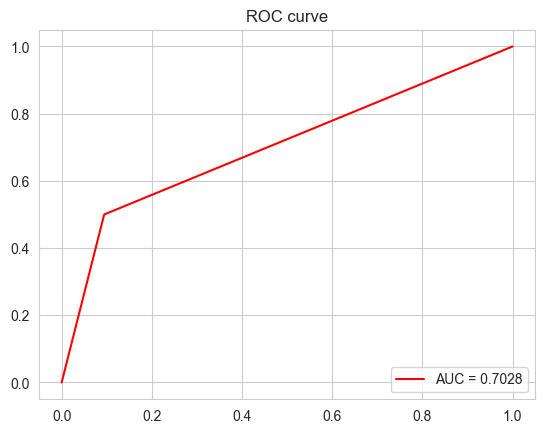

In [71]:
pre = LGBM.predict(X_test)
fpr, tpr, th = metrics.roc_curve(Y_test, pre)
plt.plot(fpr, tpr, 'r', label='AUC = %.4f' %metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.title('ROC curve')
plt.show()

Text(0.5, 1.0, 'ROC curve')

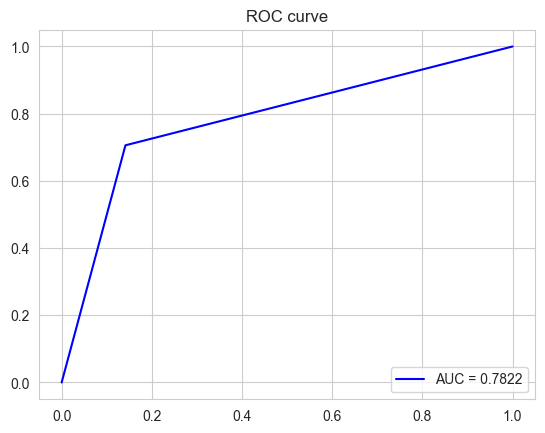

In [70]:
from sklearn import metrics
import matplotlib.pyplot as plt
pre = DT.predict(X_test)
fpr, tpr, th = metrics.roc_curve(Y_test, pre)
plt.plot(fpr, tpr, 'b', label='AUC = %.4f' %metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.title('ROC curve')
plt.show()

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

KNeighborsClassifier()

AttributeError: 'NoneType' object has no attribute 'split'

In [23]:
from sklearn import svm
model= svm.SVC(kernel='linear')
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

SVC(kernel='linear')

0.7928571428571428

In [ ]:
from sklearn import svm
model= svm.SVC(kernel='linear')
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

In [25]:
from sklearn import svm
model= svm.SVC(kernel='poly')
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

SVC(kernel='poly')

0.7571428571428571

In [24]:
from sklearn import svm
model= svm.SVC(kernel='rbf')
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

SVC()

0.7642857142857142

In [22]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train,Y_train)
DT.score(X_test,Y_test)

DecisionTreeClassifier()

0.8071428571428572

In [12]:
from lightgbm import LGBMClassifier
LGBM = LGBMClassifier()
LGBM.fit(X_train,Y_train)
# 模型评估
from sklearn.metrics import classification_report
print(classification_report(Y_test, LGBM.predict(X_test)))

LGBMClassifier()

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       104
           1       0.61      0.53      0.57        36

    accuracy                           0.79       140
   macro avg       0.73      0.71      0.72       140
weighted avg       0.78      0.79      0.79       140



In [11]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
xgb.score(X_test,Y_test)
print(classification_report(Y_test, xgb.predict(X_test)))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

0.7928571428571428

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       104
           1       0.61      0.53      0.57        36

    accuracy                           0.79       140
   macro avg       0.73      0.71      0.72       140
weighted avg       0.78      0.79      0.79       140



In [10]:
from sklearn.ensemble import RandomForestClassifier
# 先用默认参数，后续可用交叉验证，bootstrap:是否随机采样
RF = RandomForestClassifier(bootstrap=True,oob_score=True) #袋外样本必需设置True，可以验证
RF.fit(X_train,Y_train)
RF.score(X_test,Y_test)

RandomForestClassifier(oob_score=True)

0.75

In [9]:
from sklearn.ensemble import BaggingClassifier
LR3 = LogisticRegression()
# 如果没有指定机器学习器，则
bag = BaggingClassifier(base_estimator=LR3,n_estimators=50)
bag.fit(X_train,Y_train)   # 计算
bag.score(X_test,Y_test)   # 准确率

C:\ProgramData\Anaconda3\envs\cda_python\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=50)

0.8214285714285714

In [8]:
from sklearn.ensemble import AdaBoostClassifier
#先实例一个机器学习器
LR2 = LogisticRegression()
# 如果没有指定机器学习器，则默认为决策树（最大深度为1）
ada= AdaBoostClassifier(base_estimator= LR2, n_estimators= 20)  # 实例化
ada.fit(X_train,Y_train)   # 计算
ada.score(X_test,Y_test)

C:\ProgramData\Anaconda3\envs\cda_python\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=20)

0.7357142857142858

In [7]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(X_train,Y_train)
print ("Classifier Score:", clf.score(X_test,Y_test))

Classifier Score: 0.34285714285714286


In [21]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,Y_train)
LR.score(X_test,Y_test)

LogisticRegression()

0.8428571428571429

In [20]:
# 分割测试集训练集
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(train3,train2['fraud'],test_size=0.2)

In [15]:
# 进行kmeans聚类
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
score_pca = pd.DataFrame(pca.fit_transform(train3))
result = kmeans.fit(score_pca)
pd.DataFrame(result.labels_).value_counts()

C:\ProgramData\Anaconda3\envs\cda_python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [14]:
from sklearn.decomposition import PCA
# 建立模型,第一次n_components参数设置大一点，建议explain_var_ratio累积大于0.85；exp_var>0.8
# n_components:保留主成分的个数，初始设置一般为变量的个数
pca = PCA(n_components=40)
pca.fit(train3)
pca.explained_variance_
# 单个主成分解释的方差比率
pca.explained_variance_ratio_.sum()

PCA(n_components=40)

array([3.71672902, 1.95417117, 1.21033998, 1.11071472, 1.08192697,
       1.05736004, 0.99532229, 0.95884757, 0.95239204, 0.90936126,
       0.86554945, 0.44424085, 0.37193777, 0.334804  , 0.32813152,
       0.3144668 , 0.30437342, 0.27992888, 0.26942552, 0.25052126,
       0.23739328, 0.22160035, 0.19595042, 0.19153434, 0.17708339,
       0.17400827, 0.17151147, 0.16416464, 0.15678175, 0.15419796,
       0.15068887, 0.14867344, 0.13808284, 0.137262  , 0.13386156,
       0.13181085, 0.12498214, 0.12148763, 0.11999024, 0.1174027 ])

0.8100883959759397

In [4]:
from sklearn import preprocessing
for i in train3.columns:
    if train3[i].dtype == 'object':
        dummy = pd.get_dummies(train3[i], prefix=i, drop_first=True)
        train3.drop(i,inplace=True,axis=1)
        train3 = train3.join(dummy)
    else:
        train3[i]=preprocessing.scale(train3[i])
train3.head()

,age,customer_months,policy_deductable,policy_annual_premium,insured_sex,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,-0.179426,-0.140498,-0.241936,0.873049,-0.944400,1.344504,-0.840965,-1.216040,1.368643,0.095830,...,0,0,0,0,0,0,0,0,0,0
1,0.581117,0.247414,-1.060075,-1.694318,1.058873,-1.098183,1.092288,1.230018,-0.428824,-0.066629,...,0,0,0,0,0,0,0,0,0,0
2,-0.614022,-1.571466,-0.241936,2.380037,-0.944400,-1.672933,-0.840965,1.230018,-0.428824,-0.175611,...,0,0,0,0,0,0,0,1,0,0
3,0.363819,0.040528,-1.060075,2.472817,1.058873,1.200817,1.092288,1.230018,0.469909,0.628391,...,0,0,0,0,0,0,0,0,0,0
4,-1.048618,-1.071489,-0.241936,-1.714197,-0.944400,-0.379746,1.092288,1.230018,-0.428824,0.279161,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train3 = train2.drop('fraud',axis=1)

In [2]:
import os
os.chdir(r'C:\Users\fzh00\Desktop\文件\excel\保险反欺诈')
import numpy as np
import pandas as pd
train  = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
train['绑定日期']=pd.to_datetime(train['policy_bind_date'].astype(str))
train['绑定年份']=train['绑定日期'].dt.year
train['出险日期']=pd.to_datetime(train['incident_date'].astype(str))
train['出险年份']=train['出险日期'].dt.year
train['保龄']=train['出险年份']-train['绑定年份']
train['车龄']=train['出险年份']-train['auto_year']
train2 = train.drop(['policy_id','policy_bind_date','policy_csl','insured_zip','capital-loss','capital-gains','auto_year','umbrella_limit','绑定日期','绑定年份','出险日期','出险年份'],axis=1)
train2['insured_sex']= train2['insured_sex'].map({'FEMALE':0,'MALE':1})
train2.head()

,age,customer_months,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud,保龄,车龄
0,37,189,C,1000,1465.71,0,Masters,protective-serv,reading,not-in-family,...,?,54930,6029,5752,44452,Nissan,Maxima,0,1,14
1,44,234,B,500,821.24,1,JD,craft-repair,polo,other-relative,...,YES,50680,5376,10156,37347,Honda,Civic,0,17,19
2,33,23,B,1000,1844.00,0,High School,machine-op-inspct,skydiving,wife,...,NO,47829,4460,9247,33644,Jeep,Wrangler,0,19,13
3,42,210,A,500,1867.29,1,JD,transport-moving,video-games,own-child,...,YES,68862,11043,5955,53548,Suburu,Legacy,1,7,12
4,29,81,A,1000,816.25,0,MD,craft-repair,video-games,own-child,...,YES,59726,5617,10301,41550,Ford,F150,0,13,11


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"